# IMPORTING FILES AND PACKAGES

In [179]:
# Importing the neccesary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import functools
from sklearn.linear_model import LinearRegression
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from scipy.stats import pearsonr

import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [178]:
# Importing the data file
from google.colab import files
uploaded = files.upload()

Saving churn_data.csv to churn_data (1).csv


# EXPLORING AND UNDERSTANDING THE DATA SET

In [180]:
# Naming and creating the dataframe with data from the imported file
df = pd.read_csv(io.BytesIO(uploaded['churn_data.csv']), sep = ";", decimal=".")

In [181]:
# Obtaining the general information of the dataframe to get familiarized with it 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,0.14,101.06,0.90,0.28,0.82,1.56,179.78,100.44,56.31,10.05,10.24
std,0.35,39.82,0.30,0.45,1.27,1.32,54.47,20.07,16.43,2.54,2.79
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00
25%,0.00,74.00,1.00,0.00,0.00,1.00,143.70,87.00,45.00,8.33,8.50
50%,0.00,101.00,1.00,0.00,0.00,1.00,179.40,101.00,53.50,10.07,10.30
75%,0.00,127.00,1.00,1.00,1.78,2.00,216.40,114.00,66.20,11.77,12.10
max,1.00,243.00,1.00,1.00,5.40,9.00,350.80,165.00,111.30,18.19,20.00


In [183]:
# Visualising the proportion of churned costumers
colmn = df.columns
binary_colmns = []
numeric_colmns= []
for i in colmn:
    if df[i].value_counts().shape[0] == 2:
        binary_colmns.append(i)
    else:
      
      numeric_colmns.append(i)

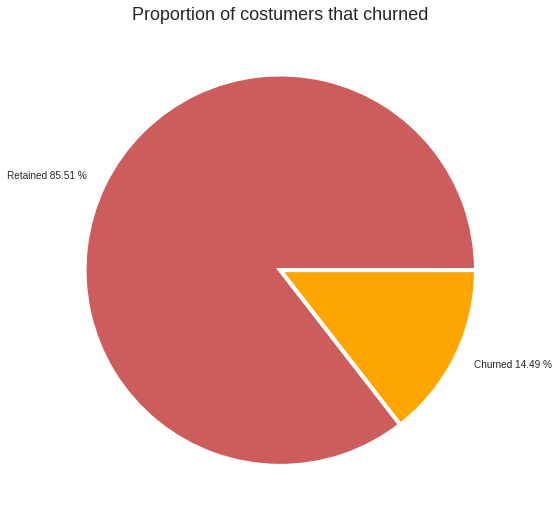

In [186]:
lab = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),"Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))]
plt.pie(df["Churn"].value_counts(), colors = ['indianred','orange'], labels = lab , 
        wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'}, pctdistance=1.1)
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title('Proportion of costumers that churned',fontsize=18)
plt.show()

We can observe that there is a relatively low proportion of costumers that churned, representing only the 15% of the values.

In [187]:
# Obtaining size and count of values in each variable 
df.agg(['size', 'count', 'nunique'])

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
size,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
count,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
nunique,2,212,2,2,174,10,1667,119,627,1024,162


We notice we have 3 binary variables in our dataset: Churn, ContractRenewal and DataPlan. We can observe their distribution in the following graph:

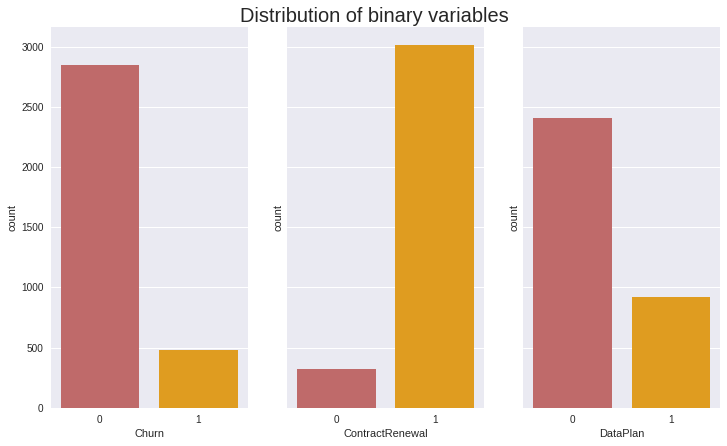

In [188]:
fig, axes = plt.subplots(1, len(binary_colmns), figsize=(12, 7), sharey=True)
j=0
for i in binary_colmns:
        sns.countplot(str(i), data=df, ax=axes[binary_colmns.index(i)], palette=['indianred','orange'])

plt.suptitle('Distribution of binary variables', y=0.92, size = 20)
plt.show()

As we can see from this plots, most of the costumers do not churn on a frequent basis, in contrast we find that many costumers find themselves renewing the contract. In most companies this is an automatic process, and that might be the reason why so many costumers end up doing so. Lastly, we can observe that there are more costumers that have a data plan than costumers that do not. 

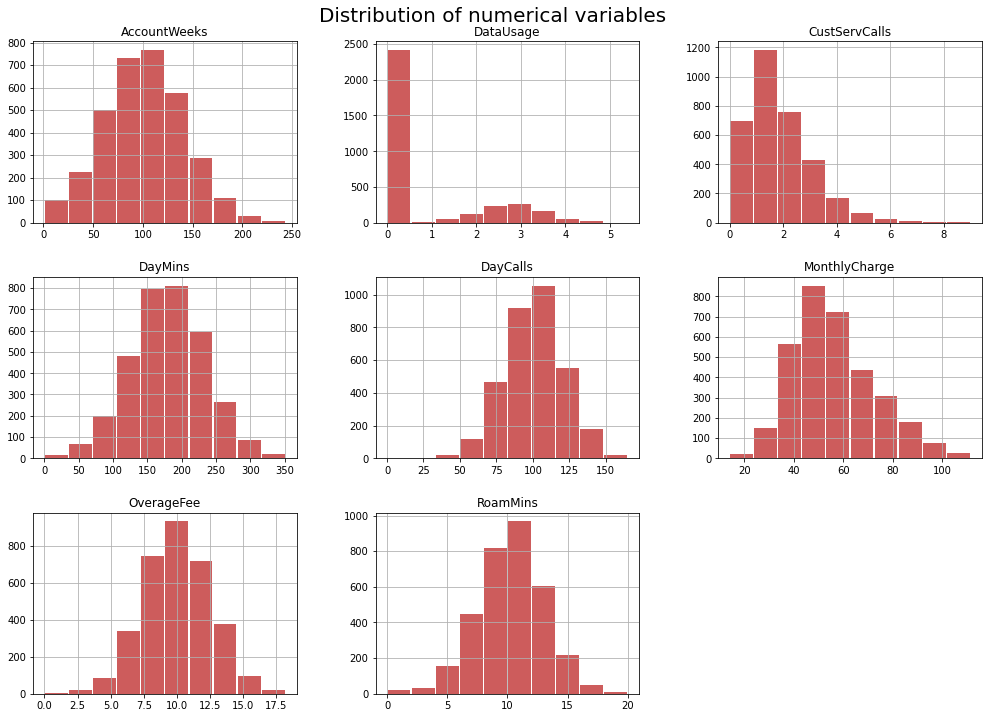

In [10]:
# Checking the distribution of the numerical variables
columns = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
df = pd.DataFrame(df)
df[columns].hist(rwidth = 0.95, color = 'indianred')
fig = plt.gcf()
fig.set_size_inches(17,12)
plt.suptitle('Distribution of numerical variables', y=0.92, size = 20)
plt.show()

In these graphic representations it is noticeable that most of the numeric variables are relatively normally distributed except for:
- Data Usage, that has a particular distribution since a lot of costumers do not have a DataPlan (as we have seen in the plotting of the binary variables) and therefore, just the little proportion of those who have a DataPlan can use their data.
- Cuostumer Service Calls which is skewed to the right.
- Monthly Charge which is slightly skewed to the right.


In [11]:
# Checking the distribution for all the variables together
trace1 = go.Box(x=df['MonthlyCharge'],name='MonthlyCharge')
trace2 = go.Box(x=df['AccountWeeks'], name='AccountWeeks')
trace3 = go.Box(x=df['OverageFee'], name='OverageFee')
trace5 = go.Box(x=df['DataUsage'], name='DataUsage')
trace6 = go.Box(x=df['CustServCalls'], name='CustServCalls')
trace7 = go.Box(x=df['DayMins'], name='DayMins')
trace8 = go.Box(x=df['DayCalls'],name='DayCalls')
trace9 = go.Box(x=df['RoamMins'],name='RoamMins')

fig = make_subplots(rows=8, cols=1)
fig.append_trace(trace1, row = 1, col = 1)
fig.append_trace(trace2, row = 2, col = 1)
fig.append_trace(trace3, row = 3, col = 1)
fig.append_trace(trace5, row = 5, col = 1)
fig.append_trace(trace6, row = 6, col = 1)
fig.append_trace(trace7, row = 7, col = 1)
fig.append_trace(trace8, row = 8, col = 1)
fig.append_trace(trace9, row = 4, col = 1)

fig.update_layout(
    autosize=False,
    width=1300,
    height=750,
    title_text = 'Distribution of each variable',
    title_x=0.5,
    title_font_size=20)

fig.show()

From this graph we conclude that the variables in this dataframe have a very distinct range of distributions, therefore, standarising in this case could be useful. 

After analizing the outliers present in each variable, we concluded not to perform any changes to these observations, since many of them might contain explanatory value. We won't process them (e.g. by taking logs) for the sake of the prediction power of the model. We think that for example in variables like Monthly Charge and Overage Fee the outliers might represent the individuals that did end up leaving the company, since people might not want to pay such a high phone bill. 

In [13]:
# Checking the ratio of null values present in every variable
pd.DataFrame(data = [df.isna().sum()/df.shape[0]*100],
             index=["Null (%)"]).T.style.background_gradient(cmap='summer_r')

,Null (%)
Churn,0.000000
AccountWeeks,0.000000
ContractRenewal,0.000000
DataPlan,0.000000
DataUsage,0.000000
CustServCalls,0.000000
DayMins,0.000000
DayCalls,0.000000
MonthlyCharge,0.000000
OverageFee,0.000000


The variables in this dataframe have no null-values, so there is no need to do any changes to adress such issue.

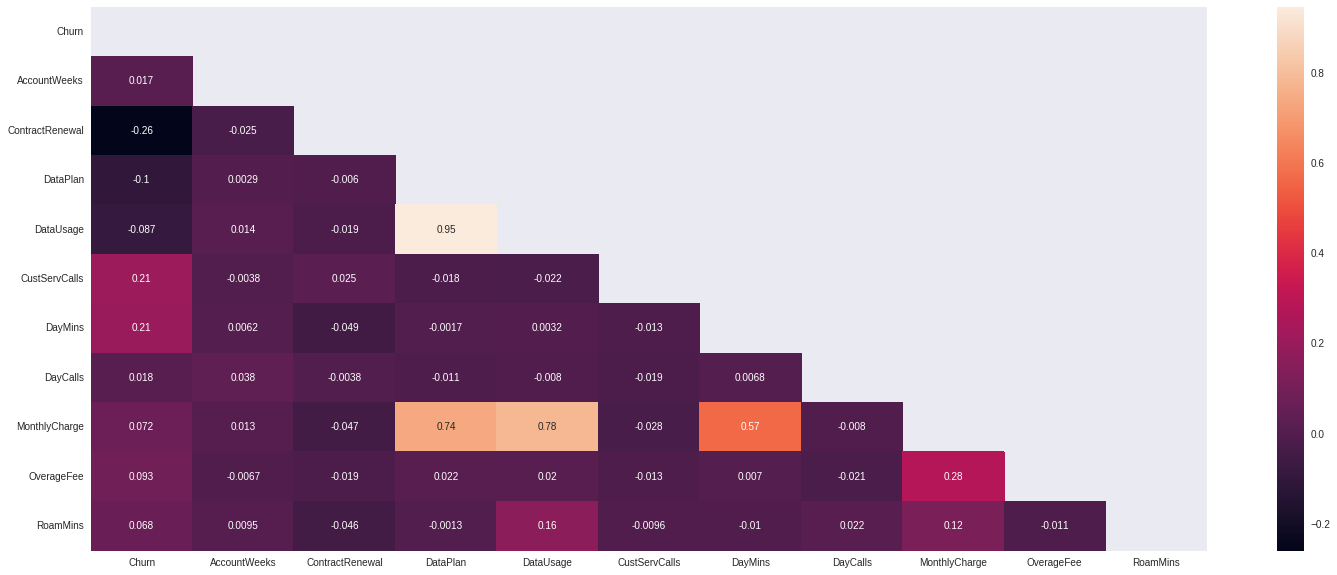

In [189]:
# Calculating correlations between variables:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(25,10))
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask = mask, annot = True)

From the correlation plot we can see that the variables that have a higher correlation with the target (Churn) are: 
- CustServCalls
- DayMins

Logically, the Churn variable has a strong negative correlation with ContractRenewal. After anlyzing the correlation values, we decided not to leave any variables out because of high correlation, there doesn't seem to be variables in this dataset that give us the same information.  

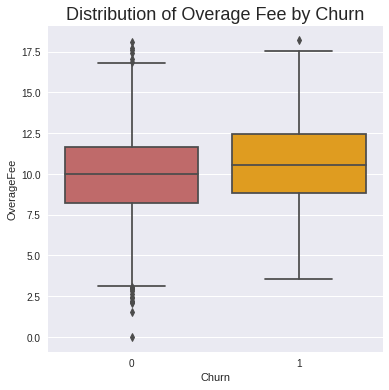

In [191]:
# Visualising the difference in the distribution of some variables and their outliers in terms of Churn costumers and renewal costumers
sns.boxplot(x='Churn',y='OverageFee', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Distribution of Overage Fee by Churn',fontsize=18)
plt.show()

On average, churned customers had a higher OverageFee than renewal costumers. 

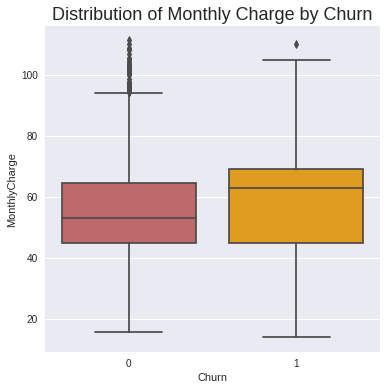

In [193]:
sns.boxplot(x='Churn', y='MonthlyCharge', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Distribution of Monthly Charge by Churn',fontsize=18)
plt.show()

Also on average, churned customers had a higher MonthlyCharge than renewal customers do.

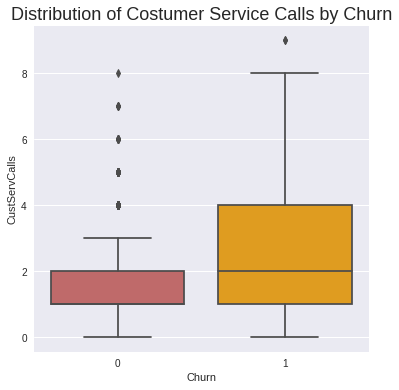

In [194]:
sns.boxplot(x='Churn', y='CustServCalls', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Distribution of Costumer Service Calls by Churn',fontsize=18)
plt.show()

Lastly we can appreciate that churned customers have noticeable much widely range for the distribution of CustServCalls, which makes sense, since given that a costumer who churns is probably not happy with the company service, she will probably make more customer service calls. 

# DATA PROCESSING

In [196]:
# Doing a copy for further modifications of the data set
df_copy = df.copy()

In [197]:
# Creating a new variable for checking on average how long is every call made during daytime
df_copy['DayMinsxCall'] = df_copy['DayMins'] / df_copy['DayCalls']
df_copy['DayMinsxCall'] = df_copy['DayMinsxCall'].fillna(0)

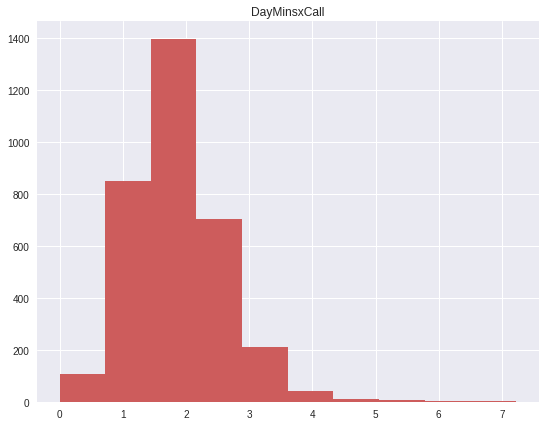

In [198]:
# Visualising its distribution:
column = ['DayMinsxCall']
df_copy = pd.DataFrame(df_copy)
df_copy[column].hist(color = 'indianred')
fig = plt.gcf()
fig.set_size_inches(9,7)
plt.show()

We see that this new variable is also a bit skweed to the right.

In [200]:
# Creating new columns to check how much do accounts last in the long term: AccountMonths and AccountYears from AccountWeeks
df_copy['AccountMonths'] = df_copy['AccountWeeks'] / 4.33333
df_copy['AccountYears'] = df_copy['AccountWeeks'] / 52

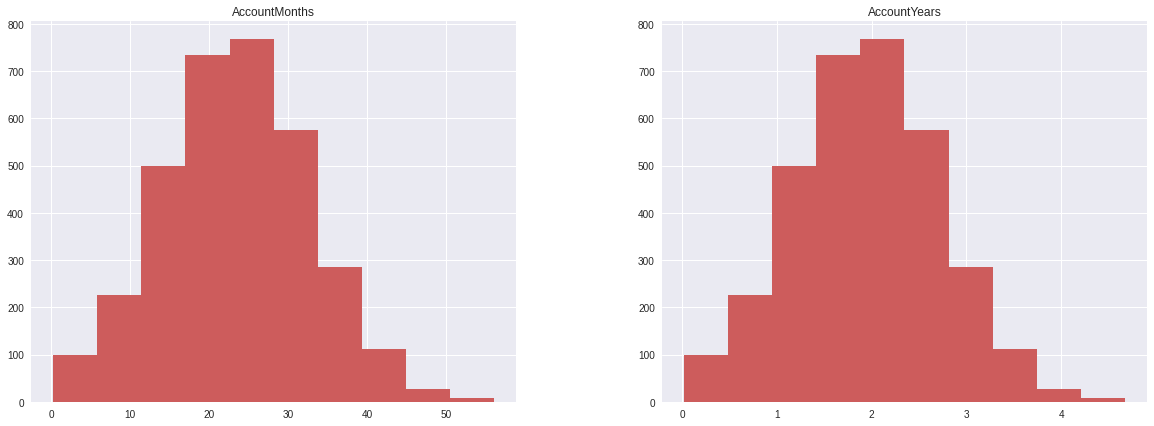

In [201]:
# Visualising their distribution:
columns = ['AccountMonths', 'AccountYears']
df_copy = pd.DataFrame(df_copy)
df_copy[columns].hist(color = 'indianred')
fig = plt.gcf()
fig.set_size_inches(20,7)
plt.show()

We are going to include these created variables in the second iteration for each model, to see whether they improve our predictions.

Due to the nature of classifier tree models, adding interaction terms should not make a difference as the interactions are captured in the way trees are generated. Therefore we won't be creating such interaction terms.



# THREE MODELS: Random Forest, XGBoost, AdaBoost

##### In this section we run each model three times with different data.

1.   The first interation leaves the data unchanged.  
2.   The second iteration adds additional variables.
3. The third iteration works with standardised data (excluding the additional variables included in the second iteration).

At the end of this section we have a table with an overview of all the accuracy scores from each model for each iteration.

## RANDOM FOREST

#### RANDOM FOREST FIRST ITERATION: Raw Model

In [202]:
# Preparing the data for modeling
features1 = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
X1 = df_copy.loc[:, features1]
y1 = df_copy.loc[:, ['Churn']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=3)

# Instantiate the Random Forest
rf1 = RandomForestClassifier(max_depth=5, random_state=0)
             
# Fit rf to the training set    
rf1.fit(X_train1, y_train1) 
 
# Predict test set labels
y_pred1 = rf1.predict(X_test1)
 
# Evaluate accuracy score
acc_test1 = accuracy_score(y_test1, y_pred1)
print('Test set accuracy of rf: {:.3f}'.format(acc_test1)) 

Test set accuracy of rf: 0.936


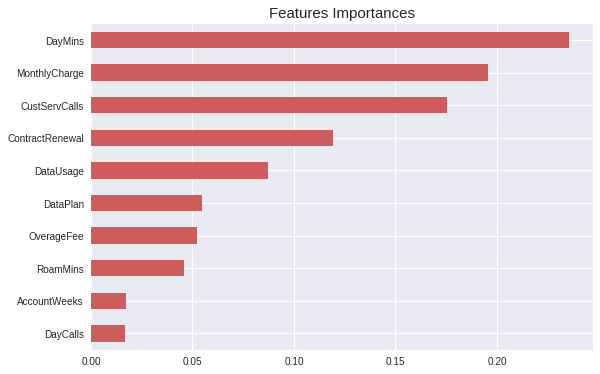

In [203]:
# Creating a pd.Series of features importances
importances1 = pd.Series(data=rf1.feature_importances_,
                        index= features1)
 
# Sorting importances
importances_sorted1 = importances1.sort_values()
 
# Drawing a horizontal barplot of importances
importances_sorted1.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

#### RANDOM FOREST SECOND ITERATION: Including the two variables created to the model

In this model, we include AccountMonths and DayMinsxCall, substituting the original variables AccountWeeks and DayCalls, to avoid multicolinearity, however, we left DayMins since it is the most important feature in the raw model.

In [204]:
# Preparing the data for modeling
features2 = ['ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMins', 'DayMinsxCall']
X2 = df_copy.loc[:, features2]
y2 = df_copy.loc[:, ['Churn']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=3)

# Instantiate rf 
rf2 = RandomForestClassifier(max_depth=5, random_state=0)
             
# Fit rf to the training set    
rf2.fit(X_train2, y_train2) 
 
# Predict test set labels
y_pred2 = rf2.predict(X_test2)
 
# Evaluate accracy score
acc_test2 = accuracy_score(y_test2, y_pred2)
print('Test set accuracy of rf: {:.3f}'.format(acc_test2)) 

Test set accuracy of rf: 0.931


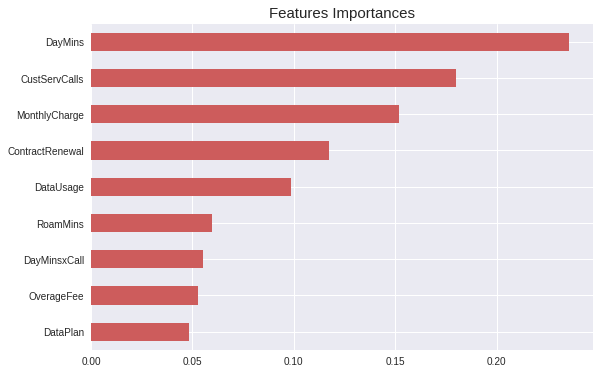

In [223]:
# Creating a pd.Series of features importances
importances2 = pd.Series(data=rf2.feature_importances_,
                        index= features2)
 
# Sort importances
importances_sorted2 = importances2.sort_values()
 
# Drawing a horizontal barplot of importances
importances_sorted2.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

Once applying the two variables created to the model, we obtain a lower accuracy score and the sorting of the features by importances does not change. We can see that DayMins is still the most important feature. We can see that Customer Service Calls acquires more relevance, and reaches the second position compared to the 3rd position it had on the raw model. We see also that the new variable Account Months doesn't seem to be relevant to the model, while it's weekly counterpart occupied a higher place in the ranking. 

#### RANDOM FOREST THIRD ITERATION: Standardising the raw model

In [226]:
# Transposing the data frame
numeric_df=pd.DataFrame(df_copy[numeric_colmns])
binary_df=pd.DataFrame(df_copy[binary_colmns])
numeric_df.head()
binary_df.head()

# Standarising the model 
scaler = StandardScaler()

# transforming the data
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)
df_stand=pd.concat([numeric_df,binary_df], axis=1)
df_stand.head()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,ContractRenewal,DataPlan
0,0.68,1.48,-0.43,1.57,0.48,1.99,-0.07,-0.09,0,1,1
1,0.15,2.27,-0.43,-0.33,1.12,1.56,-0.11,1.24,0,1,1
2,0.90,-0.64,-1.19,1.17,0.68,-0.26,-1.57,0.70,0,1,0
3,-0.43,-0.64,0.33,2.20,-1.47,0.04,-2.74,-1.30,0,0,0
4,-0.65,-0.64,1.09,-0.24,0.63,-0.93,-1.04,-0.05,0,0,0


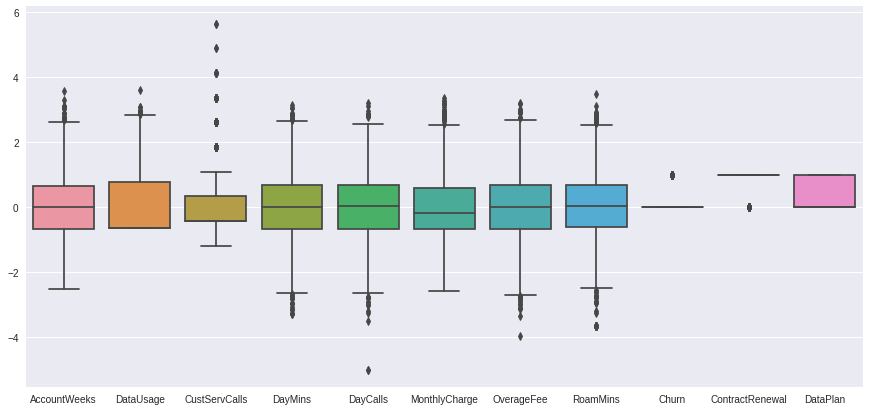

In [225]:
# Checking the range of the distribution for all the variables once we have standarised
plt.figure(figsize=(15,7))
sns.boxplot(data=df_stand)
plt.show()

As we can observe, once we standardise the variables of the model, they share a pretty close range of distribution. 

In [209]:
# Preparing the data for modelling
features_stand = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
X_stand = df_stand.loc[:, features1]
y_stand = df_stand.loc[:, ['Churn']]
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand, y_stand, test_size=0.2, random_state=3)

# Instantiate rf 
rf_stand = RandomForestClassifier(max_depth=5, random_state=0)
             
# Fit rf to the training set    
rf_stand.fit(X_train_stand, y_train_stand) 
 
# Predict test set labels
y_pred_stand = rf_stand.predict(X_test_stand)
 
# Evaluate acc_test
acc_test_stand = accuracy_score(y_test_stand, y_pred_stand)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_stand)) 

Test set accuracy of rf: 0.936


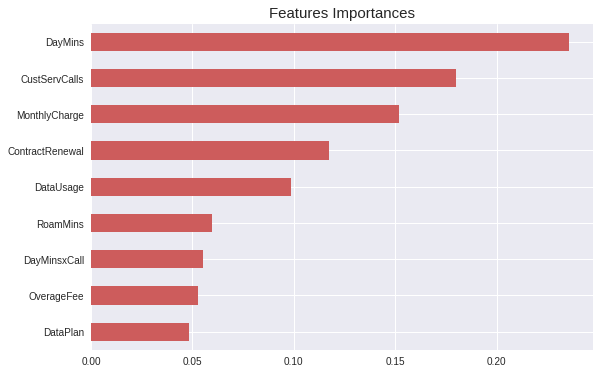

In [210]:
# Creating a pd.Series of features importances
importances_stand = pd.Series(data=rf_stand.feature_importances_,
                        index= features_stand)
 
# Sort importances
importances_sorted_stand = importances_stand.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted2.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

As we can see, for both the standardised version of the model and the raw model we get the same accuracy score and same sorting of features by their importance to the target (Churn).

## XGBOOST

#### XGBOOST FIRST ITERATION: Raw model

In [211]:
xgb_model1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit ada to the training set
xgb_model1.fit(X_train1, y_train1)

# Compute the probabilities of obtaining the positive class
y_pred_xg1 = xgb_model1.predict(X_test1)

# Evaluate acc_test
acc_test_xg1 = accuracy_score(y_test1, y_pred_xg1)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_xg1)) 

Test set accuracy of rf: 0.939


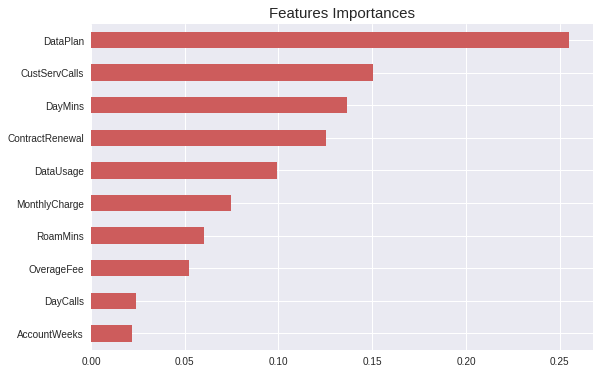

In [212]:
# Creating a pd.Series of features importances
importances1_xgb = pd.Series(data=xgb_model1.feature_importances_,
                        index= features1)
 
# Sort importances
importances_sorted1_xgb = importances1_xgb.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted1_xgb.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

It is noticeable a clear difference in the sorting for the important features once we apply the xgboost method, compared to the ones obtained with the Random Forest. The most striking changes in the weight for importance are: 
- Data Plan, which goes from the 6th position to the 1st one
- Monthly Charge,which was the 2nd more relevant feature in random forest and the 5th one in xgboost. 
- It is also striking that DayMins goes from the top position to the 3rd one in this model. 

#### XGBOOST SECOND ITERATION: Including the two variables created to the model

In [213]:
xgb_model1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit ada to the training set
xgb_model2.fit(X_train2, y_train2)

# Compute the probabilities of obtaining the positive class
y_pred_xg2 = xgb_model2.predict(X_test2)

# Evaluate acc_test
acc_test_xg2 = accuracy_score(y_test2, y_pred_xg2)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_xg2)) 

Test set accuracy of rf: 0.936


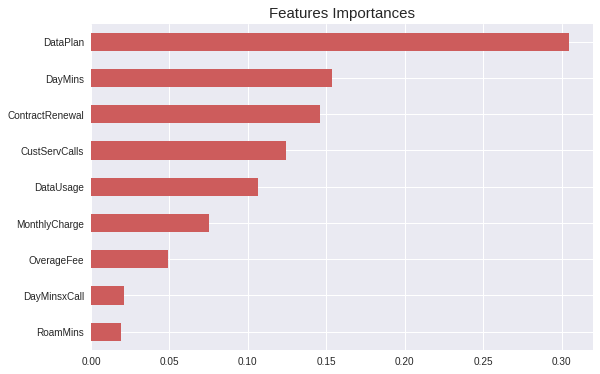

In [214]:
# Creating a pd.Series of features importances
importances2_xgb = pd.Series(data=xgb_model2.feature_importances_,
                        index= features2)
 
# Sort importances
importances_sorted2_xgb = importances2_xgb.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted2_xgb.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

Similarly to what has been commented before, we see the effect of applying the xgboost method on the weight of some specific variables, as DataPlan. The distribution of the weight of these features follows a pretty close structure to the ones obtained in the first iteration for this method. However, since we are adding the variables created in this iteration, we notice the difference in the presence of DayMinsxCall which reachs significally the 3rd position in terms of relevance, substituting its homologous DayMins. As in the model for the Random Forest, AccountMonths remains in the same position as AccountWeeks in the previous iteration. 

#### XGBOOST THIRD ITERATION: Using the standarized dataset

In [215]:
xgb_model1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit ada to the training set
xgb_model_stand.fit(X_train_stand, y_train_stand)

# Compute the probabilities of obtaining the positive class
y_pred_xg_stand = xgb_model_stand.predict(X_test_stand)

# Evaluate acc_test
acc_test_xg_stand = accuracy_score(y_test_stand, y_pred_xg_stand)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_xg_stand))

Test set accuracy of rf: 0.939


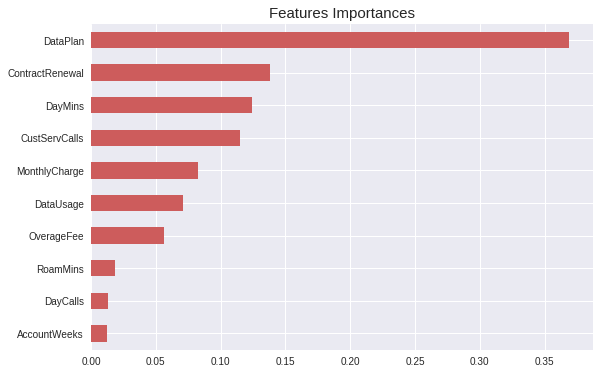

In [216]:
# Creating a pd.Series of features importances
importances_stand_xgb = pd.Series(data=xgb_model_stand.feature_importances_,
                        index= features_stand)
 
# Sort importances
importances_sorted_stand_xgb = importances_stand_xgb.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted_stand_xgb.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

As we can see here as well, for both the standardised version of the model and the raw model we get the same accuracy score and same sorting of features by their importance to the target (Churn).

## ADA BOOST

#### ADA BOOST FIRST ITERATION: Raw model

In [217]:
ada_reg1 = AdaBoostClassifier(n_estimators=100)

# Fit ada to the training set
ada_reg1.fit(X_train1, y_train1)
 
# Compute the probabilities of obtaining the positive class
y_pred_ada1 = ada_reg1.predict(X_test1)

# Evaluate acc_test
acc_test_ada1 = accuracy_score(y_test1, y_pred_ada1)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_ada1))

Test set accuracy of rf: 0.900


We can appreciate that the resulting RMSE test for the raw model applying the AdaBoost method gets a better score than the one obtained with XGboost. 

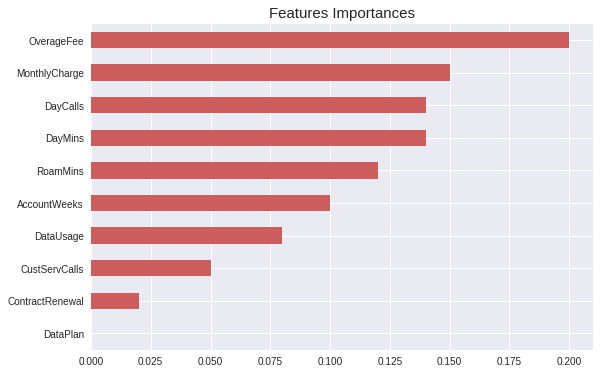

In [218]:
# Creating a pd.Series of features importances
importances1_ada = pd.Series(data=ada_reg1.feature_importances_,
                        index= features1)
 
# Sort importances
importances_sorted1_ada = importances1_ada.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted1_ada.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

It is striking that applying the AdaBoost method we just get 7 relevant features out of 10. We can conclude that this method does not take much into account the effect of the number of calls, the data plan of every consumer, and the number of weeks the account lasted for that costumer. The distribution of the importance is somehow close to the one obtained applying the random forest method, since both DayMins and CustServCalls are in the top 3 most important variables, followed by MonthlyCharge, which is in the top 3 for the random forest raw model. 

#### ADA BOOST SECOND ITERATION: Including the two variables created to the model

In [219]:
ada_reg2 = AdaBoostClassifier(n_estimators=100)

# Fit ada to the training set
ada_reg2.fit(X_train2, y_train2)
 
# Compute the probabilities of obtaining the positive class
y_pred_ada2 = ada_reg2.predict(X_test2)
 
# Evaluate acc_test
acc_test_ada2 = accuracy_score(y_test2, y_pred_ada2)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_ada2))

Test set accuracy of rf: 0.907


We can also appreciate that once the created variables are added to the model the test set RMSE of the AdaBoost goes down by one hundredth.

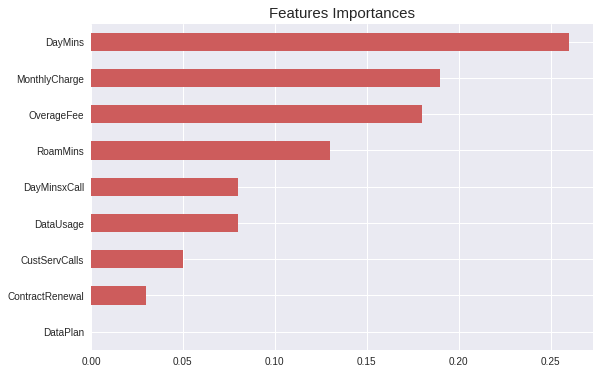

In [220]:
# Creating a pd.Series of features importances
importances2_ada = pd.Series(data=ada_reg2.feature_importances_,
                        index= features2)
 
# Sort importances
importances_sorted2_ada = importances2_ada.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted2_ada.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

We can appreciate in this plot that there is a more equal distribution of the importance between the features of the model, since we have 9 out of 10 relatively important features plotted, compared to the previous 7 obtained with the raw model. As commented before, OverageFee acquires important once we add the new variables and MonthlyCharge goes from the 4th position to having no weight at all. Also, as in the previous models, DayMinsxCall subtitutes DayMins in its top position.

#### ADA BOOST THIRD ITERATION: Standardising the raw model

In [221]:
ada_reg_stand = AdaBoostClassifier(n_estimators=100)

# Fit ada to the training set
ada_reg_stand.fit(X_train_stand, y_train_stand)
 
# Compute the probabilities of obtaining the positive class
y_pred_ada_stand = ada_reg_stand.predict(X_test_stand)

# Evaluate acc_test
acc_test_ada_stand = accuracy_score(y_test_stand, y_pred_ada_stand)
print('Test set accuracy of rf: {:.3f}'.format(acc_test_ada_stand))

Test set accuracy of rf: 0.900


We can conclude that the model with the best RMSE test score is the standardised version of the raw model once applying the AdaBoost method.

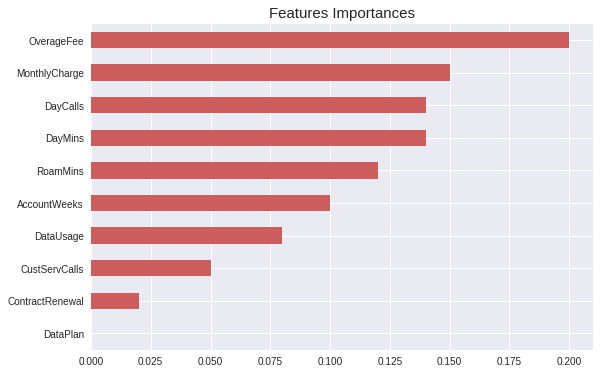

In [222]:
# Creating a pd.Series of features importances
importances_stand_ada = pd.Series(data=ada_reg_stand.feature_importances_,
                        index= features_stand)
 
# Sort importances
importances_sorted_stand_ada = importances_stand_ada.sort_values()
 
# Drawing a horizontal barplot of importances_sorted
importances_sorted_stand_ada.plot(kind='barh', color='indianred')
plt.title('Features Importances', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

Once applied the standardised version of the model while using AdaBoost we get pretty close results to the raw model, having just 7 out of 10 relevant variables, and with a similar weight distribution. The only difference is that that DataUsage has a higher weight than MonthlyCharge and RoamMins acquires a bit more importance here than in the raw version. 

## OVERVIEW OF MODEL PERFORMANCE

In [133]:
acc_results_table = {
    'Iteration': ['First', 'Second (extra variables)', 'Third (standaridised)'],
     'RF': ['{:.3f}'.format(acc_test1), '{:.3f}'.format(acc_test2), '{:.3f}'.format(acc_test_stand)],
     'XGB': ['{:.3f}'.format(acc_test_xg1), '{:.3f}'.format(acc_test_xg2), '{:.3f}'.format(acc_test_xg_stand)],
    'ADA': ['{:.3f}'.format(acc_test_ada1), '{:.3f}'.format(acc_test_ada2), '{:.3f}'.format(acc_test_ada_stand)],
 }
acc_results_table = pd.DataFrame(data=acc_results_table)
acc_results_table

,Iteration,RF,XGB,ADA
0,First,0.936,0.939,0.900
1,Second (extra variables),0.931,0.936,0.907
2,Third (standaridised),0.936,0.939,0.900


##### From this table we can see that the highest accuracy scores are achieved by the XGBoost model in the first and third iterations. The second interation gives worse accuracy for both the RandomForest and the XGBoost model, presumably because the additional variables do not generate useful splits and are atually creating unnecessary nodes in teh trees.



# HYPERPARAMETER TUNING  

##### Rather than manually adjusting the hyperparameters, we use Gridsearch to optimize a subset of hyperparameters for each model. We use the first iteration of the modes, since the other two adaptations didn't prove to be better than the first one (see table above).

#### RANDOM FOREST HYPERPARAMETER TUNING

In [134]:
# Define the dictionary 'params_grid_rf'
param_grid_rf = {
    'n_estimators':[100, 350],
    'max_features':['log2', 'auto', 'sqrt'],
    'min_samples_leaf':[2, 15]}

# Create a based model
rf_rand = RandomForestClassifier()

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf_rand, param_grid = param_grid_rf, 
                          cv = 3, n_jobs = -1, verbose = 2,)

# Fit the grid search to the data
rf_grid.fit(X_train1, y_train1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 15],
                         'n_estimators': [100, 350]},
             verbose=2)

In [135]:
# Predict test set labels
y_pred_rf_opt = rf_grid.predict(X_test1)
 
# Evaluate acc_test
acc_opt_rf = accuracy_score(y_test1, y_pred_rf_opt)
print('Test set accuracy of rf optimized: {:.3f}'.format(acc_opt_rf))

Test set accuracy of rf optimized: 0.937


In [136]:
# Obtain the optimal hyperparameters
rf_grid.best_params_

{'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}

#### XG BOOST HYPERPARAMETER TUNING


In [140]:
# Define the dictionary 'params_grid_xgb'

params_grid_xgb = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[5,10],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[10,50,250,1000]}

# Create a based model
xgb = XGBClassifier()

# Instantiate the grid search model
xgb_grid = GridSearchCV(xgb, param_grid=params_grid_xgb, cv=3, scoring="accuracy")

xgb_grid.fit(X_train1, y_train1)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.3, 0.1, 0.03],
                         'max_depth': [5, 10], 'min_child_weight': [1, 5, 15],
                         'n_estimators': [10, 50, 250, 1000],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy')

In [141]:
# Predict test set labels
y_pred_xgb_opt = xgb_grid.predict(X_test1)
 
# Evaluate acc_test
acc_opt_xgb = accuracy_score(y_test1, y_pred_xgb_opt)
print('Test set accuracy of xgb optimized: {:.3f}'.format(acc_opt_xgb))

Test set accuracy of xgb optimized: 0.939


#### ADABOOST HYPERPARAMETER TUNING

We initially also included the parameters "base_estimator__max_depth" and "base_estimator__min_samples_leaf", but the resulting accuracy was even worse.

In [142]:
# Define the dictionary 'params_grid_ada' 

params_grid_ada = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

# Create a based model
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Instantiate the grid search model
ada_grid = GridSearchCV(ada, param_grid=params_grid_ada,verbose=3,scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
ada_grid.fit(X_train_stand, y_train_stand)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy', verbose=3)

In [143]:
# Predict test set labels
y_pred_ada_opt = ada_grid.predict(X_test_stand)
 
# Evaluate acc_test
acc_opt_ada = accuracy_score(y_test_stand, y_pred_ada_opt)
print('Test set accuracy of rf optimized: {:.3f}'.format(acc_opt_ada))

Test set accuracy of rf optimized: 0.901


In [144]:
# Obtain the optimal hyperparameters
ada_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

# MODEL COMPARISON

In [145]:
acc_results_table = {
    'Iteration': ['First', 'Second (extra variables)', 'Third (standaridised)', 'Hyperparamenter Tuning'],
     'RF': ['{:.3f}'.format(acc_test1), '{:.3f}'.format(acc_test2), '{:.3f}'.format(acc_test_stand), '{:.3f}'.format(acc_opt_rf)],
     'XGB': ['{:.3f}'.format(acc_test_xg1), '{:.3f}'.format(acc_test_xg2), '{:.3f}'.format(acc_test_xg_stand), '{:.3f}'.format(0.000)],
    'ADA': ['{:.3f}'.format(acc_test_ada1), '{:.3f}'.format(acc_test_ada2), '{:.3f}'.format(acc_test_ada_stand), '{:.3f}'.format(acc_opt_ada)],
 }
acc_results_table = pd.DataFrame(data=acc_results_table)
acc_results_table

,Iteration,RF,XGB,ADA
0,First,0.936,0.939,0.900
1,Second (extra variables),0.931,0.936,0.907
2,Third (standaridised),0.936,0.939,0.900
3,Hyperparamenter Tuning,0.937,0.000,0.901


Here we have added the accuracy scores obtained through hyperparameter tuning to the ones obtained before. From looking at the results on the table we can come to the conclusion of which is the best model to validate through cross validation. 

We will only keep on working with the following models:


*   The first iteration for Random Forest
*   The first iteration for XGBoost
*   The second iteration for AdaBoost




##### RANDOM FOREST

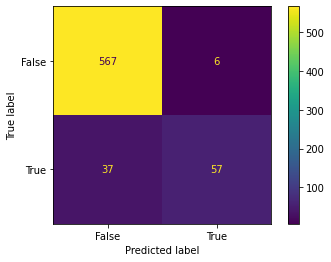

In [164]:
confusion_matrix_rf = metrics.confusion_matrix(y_test1, y_pred1)
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True])
cm_display_rf.plot()
plt.show()

In [165]:
# Obtaining the accuracy and AUC scores for the random forest model through cross validation
mean_acc_rf = cross_val_score(rf1, X_train1, y_train1, scoring="accuracy", cv = 7).mean()
mean_auc_rf = cross_val_score(rf1, X_train1, y_train1, scoring="roc_auc", cv = 7).mean()

print("Accuracy: %0.3f" % (mean_acc_rf.mean()))
print("ROC AUC: %0.3f" % (mean_auc_rf.mean()))

Accuracy: 0.920
ROC AUC: 0.903


##### XGBOOST

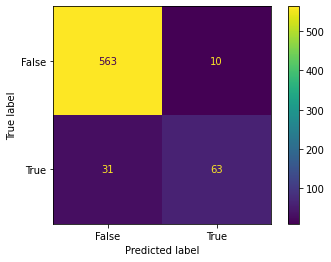

In [166]:
confusion_matrix_xgb = metrics.confusion_matrix(y_test1, y_pred_xg1)
cm_display_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb, display_labels = [False, True])
cm_display_xgb.plot()
plt.show()

In [167]:
# Obtaining the accuracy and AUC scores for the xgboost model through cross validation
mean_acc_xgb = cross_val_score(xgb_model1, X_train1, y_train1, scoring="accuracy", cv = 7).mean()
mean_auc_xgb = cross_val_score(xgb_model1, X_train1, y_train1, scoring="roc_auc", cv = 7).mean()

print("Accuracy: %0.3f" % (mean_acc_xgb.mean()))
print("ROC AUC: %0.3f" % (mean_auc_xgb.mean()))

Accuracy: 0.936
ROC AUC: 0.907


##### ADABOOST

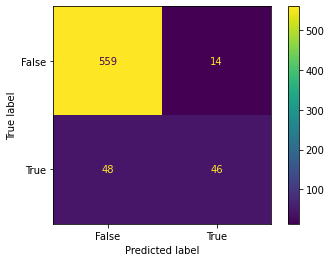

In [168]:
confusion_matrix_ada = metrics.confusion_matrix(y_test_stand, y_pred_ada2)
cm_display_ada = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ada, display_labels = [False, True])
cm_display_ada.plot()
plt.show()

In [169]:
# Obtaining the accuracy and AUC scores for the xgboost model through cross validation
mean_acc_ada = cross_val_score(ada_reg2, X_train2, y_train2, scoring="accuracy", cv = 7).mean()
mean_auc_ada = cross_val_score(ada_reg2, X_train2, y_train2, scoring="roc_auc", cv = 7).mean()

print("Accuracy: %0.3f" % (mean_acc_ada.mean()))
print("ROC AUC: %0.3f" % (mean_auc_ada.mean()))

Accuracy: 0.893
ROC AUC: 0.865


##### SCORES COMPARISON

In [75]:
acc_auc_results_table = {
    'Score': ['Accuracy', 'AUC'],
     'RF': ['{:.3f}'.format(mean_acc_rf), '{:.3f}'.format(mean_auc_rf)],
     'XGB': ['{:.3f}'.format(mean_acc_xgb), '{:.3f}'.format(mean_auc_xgb)],
    'ADA': ['{:.3f}'.format(mean_acc_ada), '{:.3f}'.format(mean_auc_ada)],
 }
acc_auc_results_table = pd.DataFrame(data=acc_auc_results_table)
acc_auc_results_table

,Score,RF,XGB,ADA
0,Accuracy,0.920,0.936,0.893
1,AUC,0.903,0.903,0.865


We can observe that the best model to predict wether a client is going to churn or not is the XGBoost one. The AUC for this model turns out to be 0.903 and since this is close to 1, we can confirm that the model does a good job at classifying data. It also has the hughest accuracy score of 0.936.

Eitherway we see that the AUC values are very similar to one another in the XGBoost and Random Forest models. We could see this graphically by observing the probabilities for both models in one graph. 

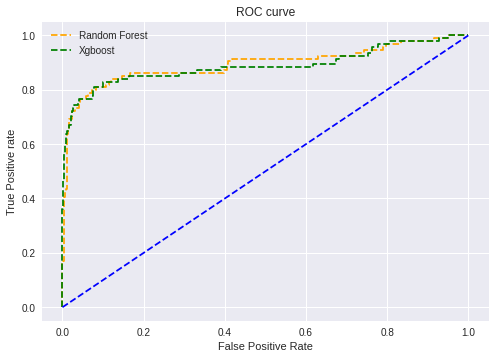

In [170]:
# Predicting probabilities
pred_rf_roc = rf1.predict_proba(X_test1)
pred_xgb_roc = xgb_model1.predict_proba(X_test1)

# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test1, pred_rf_roc[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test1, pred_xgb_roc[:,1], pos_label=1)

# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test1))]
p_fpr, p_tpr, _ = roc_curve(y_test1, random_probs, pos_label=1)

# Plotting roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Xgboost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()



# QUESTIONS

##### 1) What variables are contributing to customer churn?




The models disagree about what features are most important in determining churn. Even within one model, different iterations emphasise different features. The model that has scored the highest in terms of accuracy is the first interation of the Random Forest. According to this model the most important feature is whether or not a customer has a data plan, followed by the nuber of customer service calls and whether or not they have renewed the contract before.

This is shown once more in the diagram below:

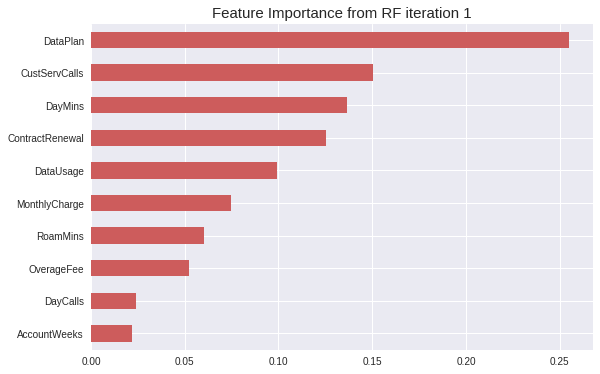

In [171]:
importances_sorted1_xgb.plot(kind='barh', color='indianred')
plt.title('Feature Importance from RF iteration 1', size = 15)
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.show()

##### 2) Who are the customers more likely to churn?

The diagram above only tells us which variables are important for prediction. It does not tell us which "direction" the effect takes. This means we have reason to believe that whether someone has a data plan matters, but we don't know if having it or not having it makes a customer more likely to churn. This is even more tricky with continuous variable such as daily minutes: we don't know if customers above or below a threshold are more likely to churn or whether the likelihood of churning increase for the extreme ends of the distribution.

We therefore need to look back at the data and possibly use out intution. We already plotted a few variables in relation to churn in the data exploration section above.

Below we investigate the top variables that seem to matter to see if there is a clear trend between those who do and don't churn.

This is most difficult for the binary variables such as DataPlan and ContractRenewal. For these we employ Pearson's correlation to get an idea in which direction they may be related to Churn.

In [172]:
corr, _ = pearsonr(df["DataPlan"], df["Churn"])
print('Pearsons correlation for Data Plan: %.3f' % corr)

corr, _ = pearsonr(df["DataPlan"], df["ContractRenewal"])
print('Pearsons correlation for Contract Renewal: %.3f' % corr)

Pearsons correlation for Data Plan: -0.102
Pearsons correlation for Contract Renewal: -0.006


These reults imply a slight negative correlation for having a data plan: having a data plan (1) seems to be inversely to curning (1). So it's not having a data plan that may increase the likelihood of churning. For Contract renewal there is almost no correlation.

These values may however simply reflect that using Pearson's correlation is not appropriate here becuase of the way these binary variables are distributed in the data.

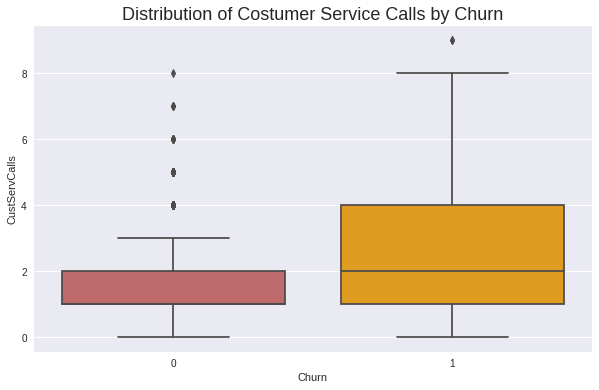

In [174]:
sns.boxplot(x='Churn', y='CustServCalls', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Distribution of Costumer Service Calls by Churn',fontsize=18)
plt.show()

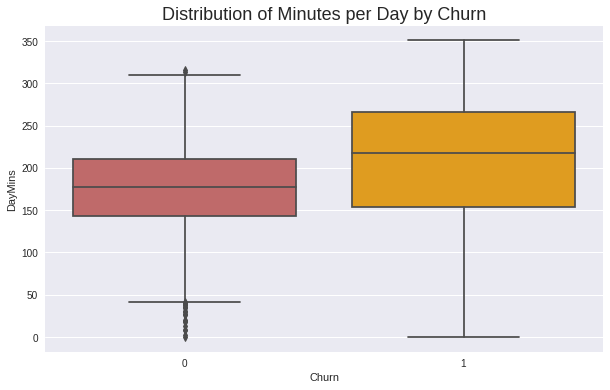

In [175]:
sns.boxplot(x='Churn', y='DayMins', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Distribution of Minutes per Day by Churn',fontsize=18)
plt.show()

Although the difference is less stark than for customer service calls, those who churn seem to spend more minutes on the phone on average. Intuitively this is less obvious. However, a possible narrative would be that those who call for long periods of time are more liklely to encounter issues.  However it is important to note that the overall range as well as the interquartile range among those who churn is greater than for those who don't, so this is not conclusive.

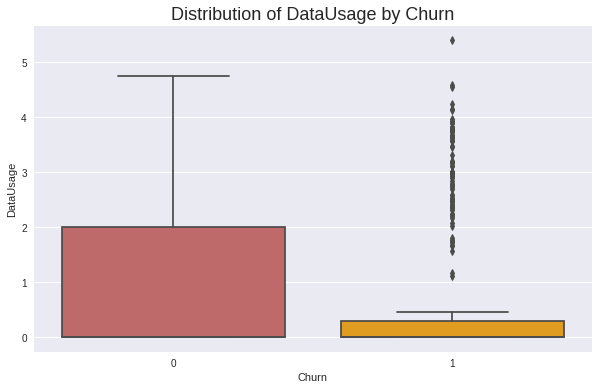

In [176]:
sns.boxplot(x='Churn', y='DataUsage', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Distribution of DataUsage by Churn',fontsize=18)
plt.show()

The data usage graph gives a very different picture from the daily minutes. Here it seems that those who churn seem to barely use data - only a long tail of outliers uses between 1 and 6 gigabytes of monthly data. This may be in line with the negative correlation of churning and having a data plan: those who don't churn seem to mostly stay within a 2 gigabyte limit, which may correspond to a data plan they have subscribed to.

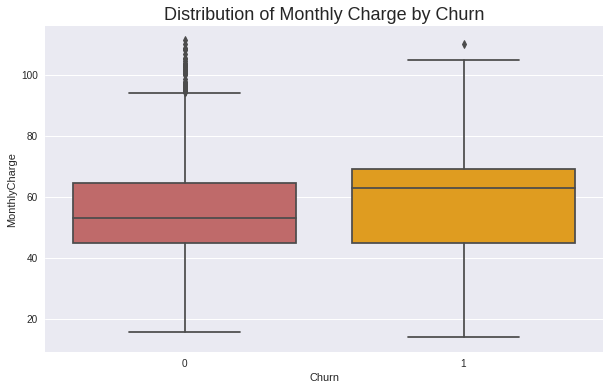

In [185]:
sns.boxplot(x='Churn', y='MonthlyCharge', data=df, palette=['indianred','orange'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Distribution of Monthly Charge by Churn',fontsize=18)
plt.show()

It seems that the monthly bill is higher for churning customers. This makes sense: they may be leaving becuase they can shop for a better deal to meet their needs.

We also plotted the remaining variables of Roaming Minutes, the largest Overage Fee, the Daily calls and the number of Account Weeks the customers had been active for. However, they are firstly not deemed that important by the RF model and secondly there is no clear trend anymore between those who do and do not churn. Therefore overall we can say that higher customer service calls may be driving the feature importance, alongside low data usage - which may in turn be correlated with the most important festure, i.e. having a data plan.

This leads us to believe that the kind of customer who is likely to churn tends to use their phone for speaking rather than for using the internet (away from Wifi connections) and may also not have a data plan.

##### 3) What actions can be taken to stop them from leaving?

Ideally we would like to know more about these users  and what they ideally want. It would be worth testing a few different offers on customers who are "at risk" of churning. We have two main suggestions:

1.   The churning customers seem to be reaching out through customer service calls before they leave. It may therefore be important to quality assure the way these calls are handled. It could be an opportunity to directly check in with the customer about their preferences to see if they are on the most appropriate plan for their needs. If the customer has been facing issues, they could also give them a special deal to compensate them for their difficulties. This would possibly incentivise customers to stay.

2.    The customers who churn seem to be more likely to use their phone for calls rather than to be online. It may therefore be worth offering them a package that gives them more calling minutes. It seems that churning customers have higher monthly bills on average, so maybe their are on a suboptimal plan that charges them highly for going above a call limit (e.g. above 200 minutes a day). We also noted that the Overage Fee data is only for the single largest fee in the last 12 months. However, it may be more important to look at how much a client has been changed in such fees over time. It is not clear whether these fees are reflected in the monthly charge data. A bit of competitor analysis is requires: if customers are able to leave and get a deal with unlimited minutes of calling, the company may need to follow suit.

We also considered, that if they do not yet have a data plan, the company could offer the customer a plan at a reduced price so that they can start using their phone in that way. However, if they already have one or maybe had one in the past and barely used it, this is unlikely to have much impact.